<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [3]:
import boto3
import pandas as pd

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [4]:
dataset = "vehicle_dataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data
data = pd.read_csv(dataset_url)
data.head()

timestep_time  vehicle_co  vehicle_co2  vehicle_hc  vehicle_nox  \
0            0.0        0.00      2416.04        0.01         0.72   
1          201.0        0.00         0.00        0.00         0.00   
2          207.0       86.49      6617.38        0.56         2.37   
3          213.0        0.00         0.00        0.00         0.00   
4          221.0        0.00         0.00        0.00         0.00   

   vehicle_pmx  vehicle_angle   vehicle_eclass  vehicle_electricity  \
0         0.01          42.25  HBEFA3/PC_G_EU4                  0.0   
1         0.00          91.76  HBEFA3/PC_G_EU4                  0.0   
2         0.14          91.76  HBEFA3/PC_G_EU4                  0.0   
3         0.00          91.76  HBEFA3/PC_G_EU4                  0.0   
4         0.00         342.93  HBEFA3/PC_G_EU4                  0.0   

   vehicle_fuel  ...   vehicle_lane vehicle_noise  vehicle_pos  vehicle_route  \
0          1.04  ...    5330181#0_0         65.15         5.10    !veh0!var#1   
1          0.00  ...      5341362_0         72.96       238.01    !veh0!var#1   
2          2.84  ...      5341362_0         73.70       411.72    !veh0!var#1   
3          0.00  ...      5341362_0         58.68       540.68    !veh0!var#1   
4          0.00  ...  744985604#0_0         64.08        67.60    !veh0!var#1   

  vehicle_speed   vehicle_type vehicle_waiting  vehicle_x  vehicle_y  \
0         14.72  veh_passenger             0.0   18279.94   24533.12   
1         28.16  veh_passenger             0.0   18089.47   27689.14   
2         29.11  veh_passenger             0.0   18263.10   27683.79   
3         11.33  veh_passenger             0.0   18391.99   27679.83   
4         13.61  veh_passenger             0.0   18398.95   27755.25   

                      __dt  
0  2024-04-08 00:00:00.000  
1  2024-04-08 00:00:00.000  
2  2024-04-08 00:00:00.000  
3  2024-04-08 00:00:00.000  
4  2024-04-08 00:00:00.000  

[5 rows x 21 columns]

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>

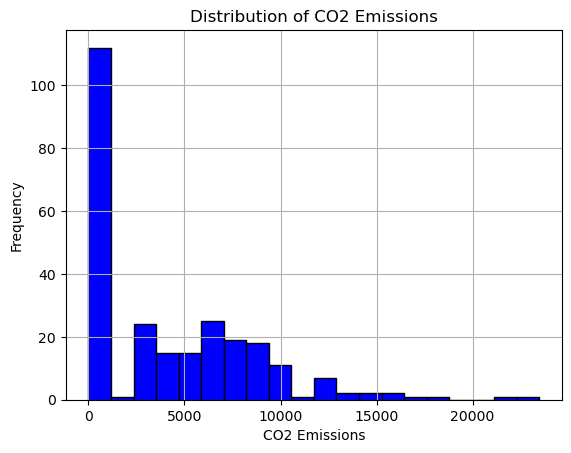

In [8]:
#Visualization 1: Histogram of CO2 emissions of this vehicle
import matplotlib.pyplot as plt

# Create a histogram of CO2 emissions
plt.hist(data['vehicle_co2'], bins=20, color='blue', edgecolor='black')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.grid(True)
plt.show()


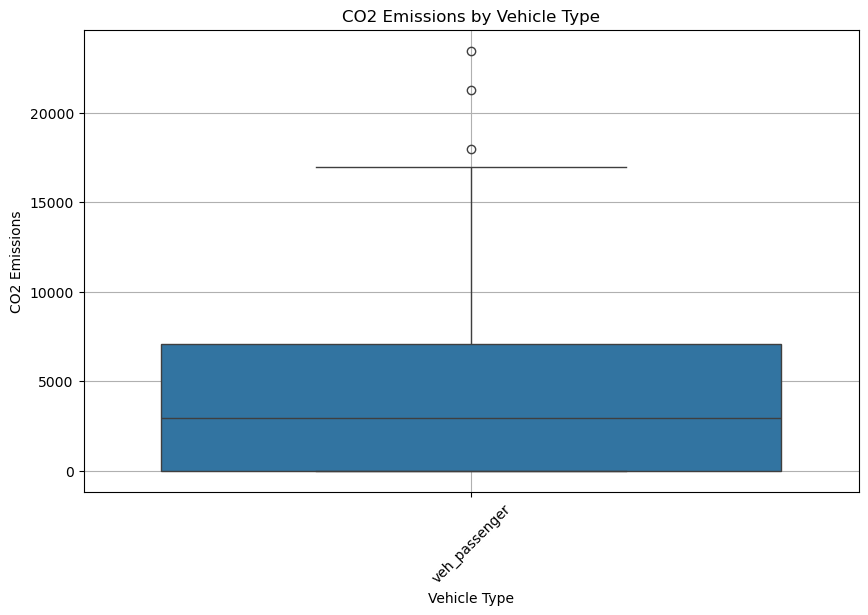

In [10]:
# Visualization 2: Boxplot of CO2 emissions for vehicles
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle_type', y='vehicle_co2', data=data)
plt.xlabel('Vehicle Type')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions by Vehicle Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


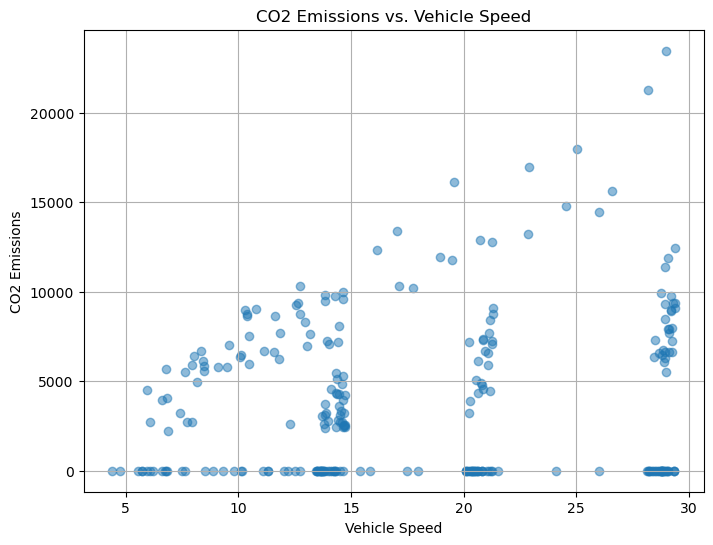

In [11]:
# Visualization 3: Scatter plot of CO2 emissions vs. vehicle speed
plt.figure(figsize=(8, 6))
plt.scatter(data['vehicle_speed'], data['vehicle_co2'], alpha=0.5)
plt.xlabel('Vehicle Speed')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs. Vehicle Speed')
plt.grid(True)
plt.show()
